# PISA 2012 Data:
## Qualitative Reading Factors in Chinese and American Educational Culture
### by Nathaniel A. Miller


## Investigation Overview

> The PISA assessment conducted in 2012 and more recently in 2018 includes quesionnaires filled out my students, parents, and teachers. It is well known that several Pacific Rim countries outperform the rest of the world markedly in mathematical performance. Student reading performance is often not as highly prioritized, nor does it receive the same media attention. I accordingly wanted to examine the role of various factors that might contribute to better reading performance in China and the US. I first survey overall comparative performance, the disparities between reading and math performance, before examining two sets of variables: measures of social acceptance and measures of parent education. In the US, current studies emphasize the strong role of self-esteem, confidence (proxies for social acceptance) and parental involvement and education in childrens' performance. The data seem indicate that while these correlate to performance in both the US and China, Chinese students expression low levels of social acceptance and whose parents have lower educational attainments still manage to outperform the US peers by considerable margins.

## Dataset Overview

> The dataset consists of a survey by the Programme for International Student Assessment (PISA) of about 510,000 15-16-year olds from OECD countries. They survey consists of evaluations of mathematical, scientific, and reading ability, and a questionnaire about various social, educational, and cultural beliefs and practices.

In [1]:
# import all packages and set plots to be embedded inline
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches
from scipy.stats import norm

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa_2012_clean.csv')

## International reading rankings overview

> Where do the US and China fall in comparison to other countries? As is well-known, Chinese students perform very well in all levels of PISA's assessment, and the US does not. The USA in 2012 fell in 25th place (not counting 2 US states measured separately) for reading among the 67 countries measured.

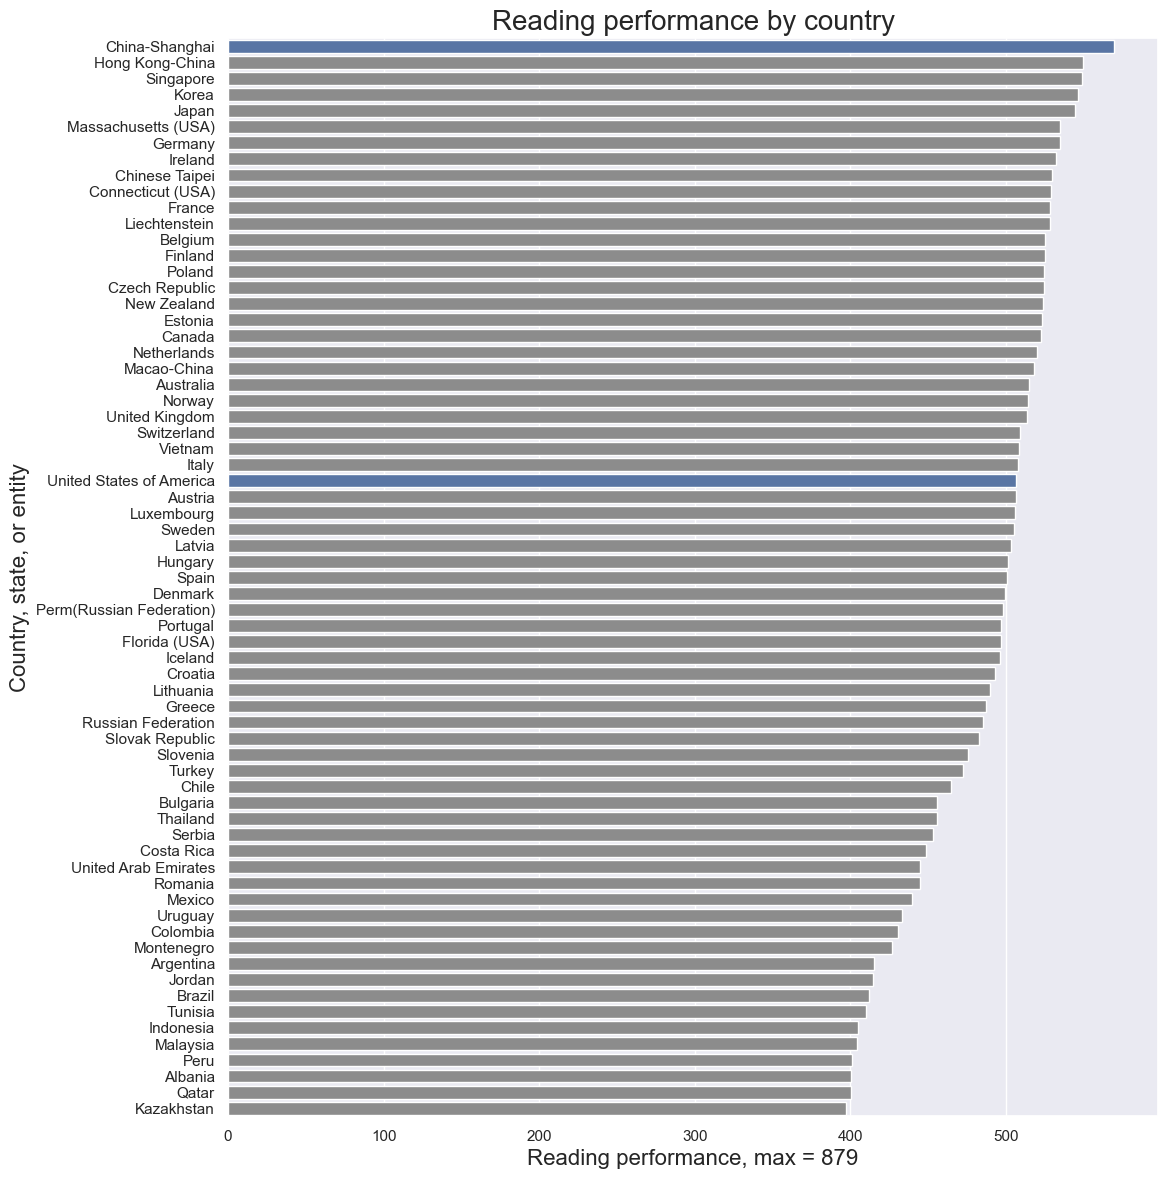

In [12]:
by_country = df.groupby('Country')['reading_pv1'].mean().sort_values(ascending=False)
sns.set()
base_color = sns.color_palette()[7]
highlight = sns.color_palette()[0]
Chinese_red = sns.color_palette("Reds")[4]
plt.figure(figsize=(12,14))
clrs = [highlight if y == "China-Shanghai" or y == "United States of America" else base_color for y in by_country.index]
sns.barplot(y = 'Country', x = 'reading_pv1', data = df, order = by_country.index, palette=clrs, ci=None)
plt.title('Reading performance by country', fontsize=20)
plt.xlabel('Reading performance, max = 879', fontsize = 16)
plt.ylabel('Country, state, or entity', fontsize = 16);

## Chinese overperformance in math, US underperformance &mdash; and vice versa

> Are students who perform better in math worse at reading and vice versa? This is a popular conception, but it is not the case. I subtracted math performance from reading performance and found that globally those who performed better at reading (positive numbers in the plot) and those who performed worse (negative numbers) are evenly distributed around 0; those who have equal aptitude in both reading and math. Chinese students, however, are much better at math on average; this is likely the result of its prioritization within the educational system. Their performance is normally distributed around -46 (46 points better at math), while the US perform about 14 points better in reading. This chart shows the slight overperformance of US students in reading versus the overperformance of Chinese students in math.

> ❗ **Bear in mind that in absolute terms, Chinese students perform better in both measures on average than American students. The plot below shows the _difference_ between reading and math scores.**

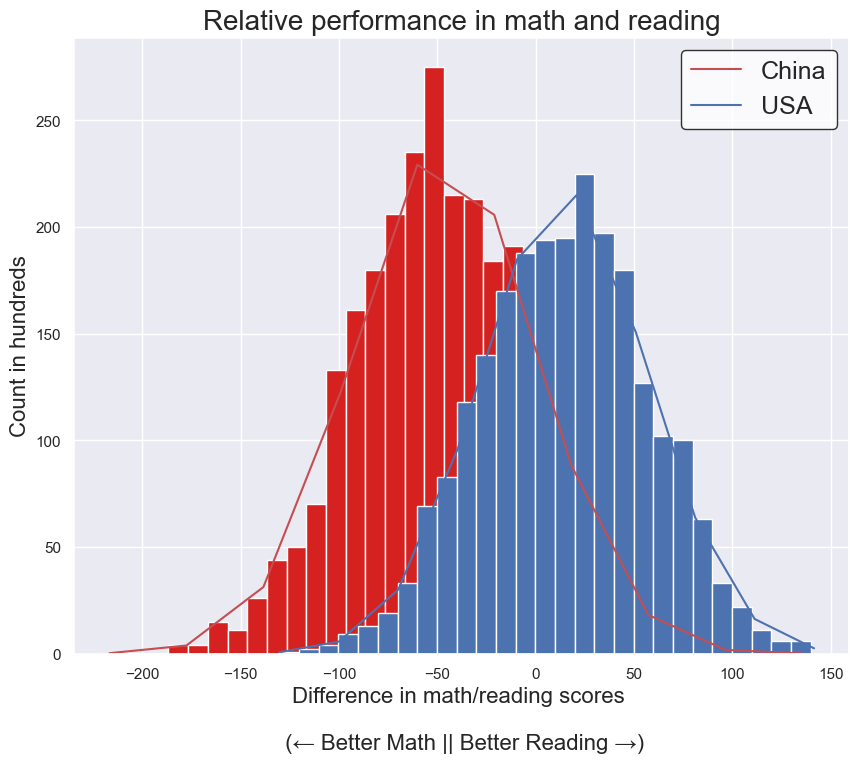

In [4]:
plt.figure(figsize=(10, 8))

df['diff'] = (df.reading_pv1 - df.math_pv1)
China_Shanghai = df.loc[df['Country'] == 'China-Shanghai']
USA = df.loc[df['Country'] == 'United States of America']

df['diff'] = (China_Shanghai.reading_pv1 - China_Shanghai.math_pv1)
bins = np.arange(China_Shanghai['diff'].min(), China_Shanghai['diff'].max(), 10)
plt.hist(China_Shanghai['diff'], bins = bins, color = Chinese_red)

samp_mean = China_Shanghai['diff'].mean()
samp_sd = China_Shanghai['diff'].std()

x = np.linspace(China_Shanghai['diff'].min(), China_Shanghai['diff'].max(), 10)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= China_Shanghai.shape[0] * 10 # scale the distribution height

plt.plot(x, y, 'r');

df['diff'] = (USA.reading_pv1 - USA.math_pv1)
bins = np.arange(USA['diff'].min(), USA['diff'].max(), 10)
plt.hist(USA['diff'], bins = bins, color = highlight)
samp_mean = USA['diff'].mean()
samp_sd = USA['diff'].std()

x = np.linspace(USA['diff'].min(), USA['diff'].max(), 10)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= USA.shape[0] * 10 # scale the distribution height

plt.plot(x, y, 'b')
plt.legend(['China', 'USA'], prop={'size': 18}, facecolor = 'white', edgecolor = 'black')
plt.title('Relative performance in math and reading', fontsize=20)
plt.xlabel('Difference in math/reading scores \n \n (\u2190 Better Math || Better Reading \u2192)', fontsize = 16)
plt.ylabel('Count in hundreds', fontsize = 16);

## Parents' education and childrens' reading in China and the US

> How do parental education and its proxy books at home affect student performance if we compare China and the US? Although in both countries reading performance increases with parents' educational level and number of books at home, in terms of absolute performance, parents' educational level does not constrain Chinese students, or rather, it is not a sufficient explanatory variable for US students' lower performance; we see, for example, that students' with parents who have reached ISCED 3 (high school, A-levels) have a visibly superior median and interquartile range for their reading scores than American students with BAs. Chinese students also perform better with fewer books at home.

In [5]:
# lists to order categorical variables. num_books is discrete numeric, but since we don't have further data on the specific
# numbers within each range, no binning is possible and I'll treat them as ordinal categoricals. 
num_books = ['0-10 books ', '11-25 books ', '26-100 books ', '101-200 books ', '201-500 books ', 'More than 500 books']
others_like_likert = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
feel_outsider_likert = others_like_likert
parents_highest_likert = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edxlabels = ['None', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secodary non-tertiary', 'Short tertiary', 'BA']

In [6]:
# dict for for-loop below to order categorical data
likert_dict = {'books_at_home': num_books, 'feel_outsider': feel_outsider_likert,
                'others_like_me': others_like_likert, 'parents_highest_ed': parents_highest_likert}

In [7]:
# function to order the categorical columns
def likert_cat(column, likert_list):
    likert_classes = likert_list
    column_classes = pd.api.types.CategoricalDtype(ordered = True, categories = likert_classes)
    df[column] = df[column].astype(column_classes);

In [8]:
# for-loop with function call to handle everything in likert_dict
for k, v in likert_dict.items():
    likert_cat(k, v)

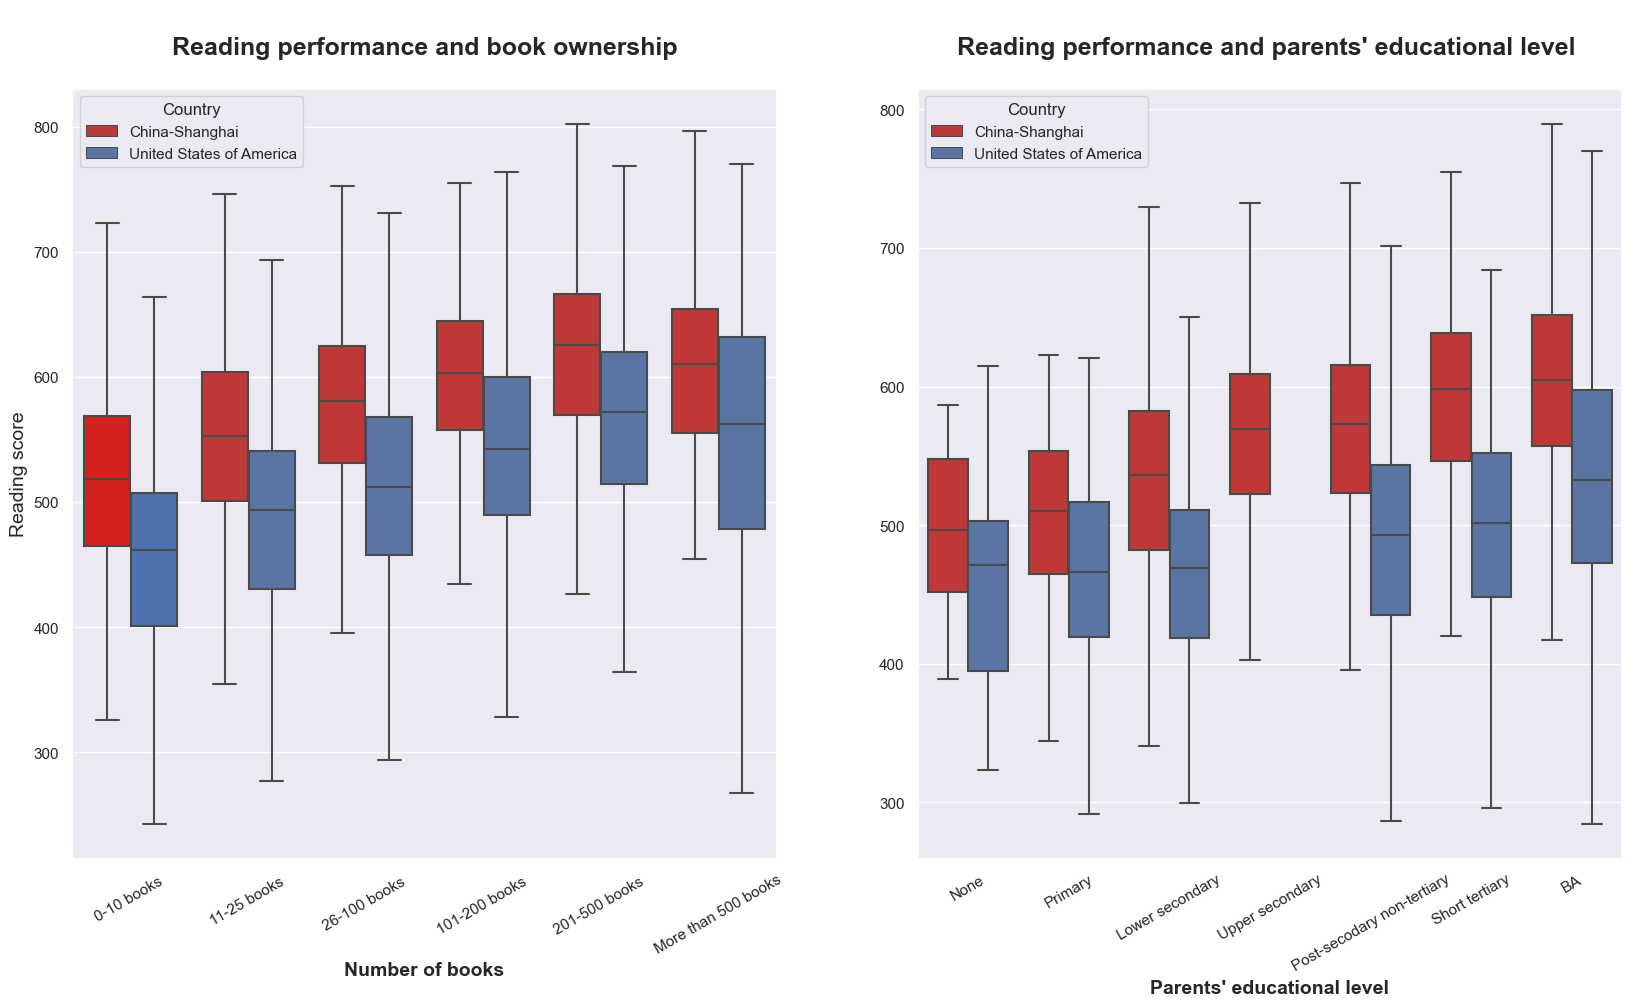

In [11]:
# Run this cell twice, the colors don't display correctly the first time for some reason

df_sub = df.loc[df['Country'].isin(['United States of America', 'China-Shanghai'])]

f, axes = plt.subplots(1, 2)
f.set_size_inches(20, 10)

sns.boxplot(data= df_sub, x = 'books_at_home', y = 'reading_pv1',
           hue = 'Country', ax=axes[0], showfliers=False)
axes[0].set_xticklabels(labels = num_books, rotation=30)


sns.boxplot(data= df_sub, x = 'parents_highest_ed', y = 'reading_pv1',
           hue= 'Country', ax=axes[1], showfliers=False)
axes[1].set_xticklabels(labels = edxlabels, rotation=30);
my_colours = (Chinese_red, highlight)
sns.set_palette(my_colours)

boxes = f.findobj(matplotlib.patches.PathPatch)
for color, box in zip(my_colours[::2]+my_colours[1::2], boxes):
    box.set_facecolor(color)

axes[1].set_title('\nReading performance and parents\' educational level \n', fontsize=18, fontweight="bold");
axes[0].set_title('\nReading performance and book ownership\n', fontsize = 18, fontweight="bold")
axes[0].set_xlabel('Number of books', fontsize=14, fontweight = "bold");
axes[0].set_ylabel('Reading score', fontsize=14);
axes[1].set_xlabel('Parents\' educational level', fontsize=14, fontweight = "bold")
axes[1].set_ylabel(' ', fontsize=14);


# https://stackoverflow.com/questions/51899470/individual-colours-for-grouped-boxplots-in-seaborn for color

## Social acceptance and childrens' reading in China and the US

> How do measures of social acceptance correspond to different performance levels in China and the US? This is the most interesting result. While in the US students who felt others disliked them performed much more poorly on reading evaluations, there is very little discernible variation amongst the four responses for Chinese students. Among American students, the more strongly the students feel like outsiders, the lower their reading performance. There is a similar correlation among Chinese students, but it is not as stark. Here it does seem as if we finally have a measure of socio-cultural values affecting education. We can speculate that while it is accepted in the US that introversion, social exclusion, or low self-esteem may faciliate poorer reading performance, these characteristics are either less tolerated among Chinese children or their affect on their reading performance is nullified or unacceptable in some way.

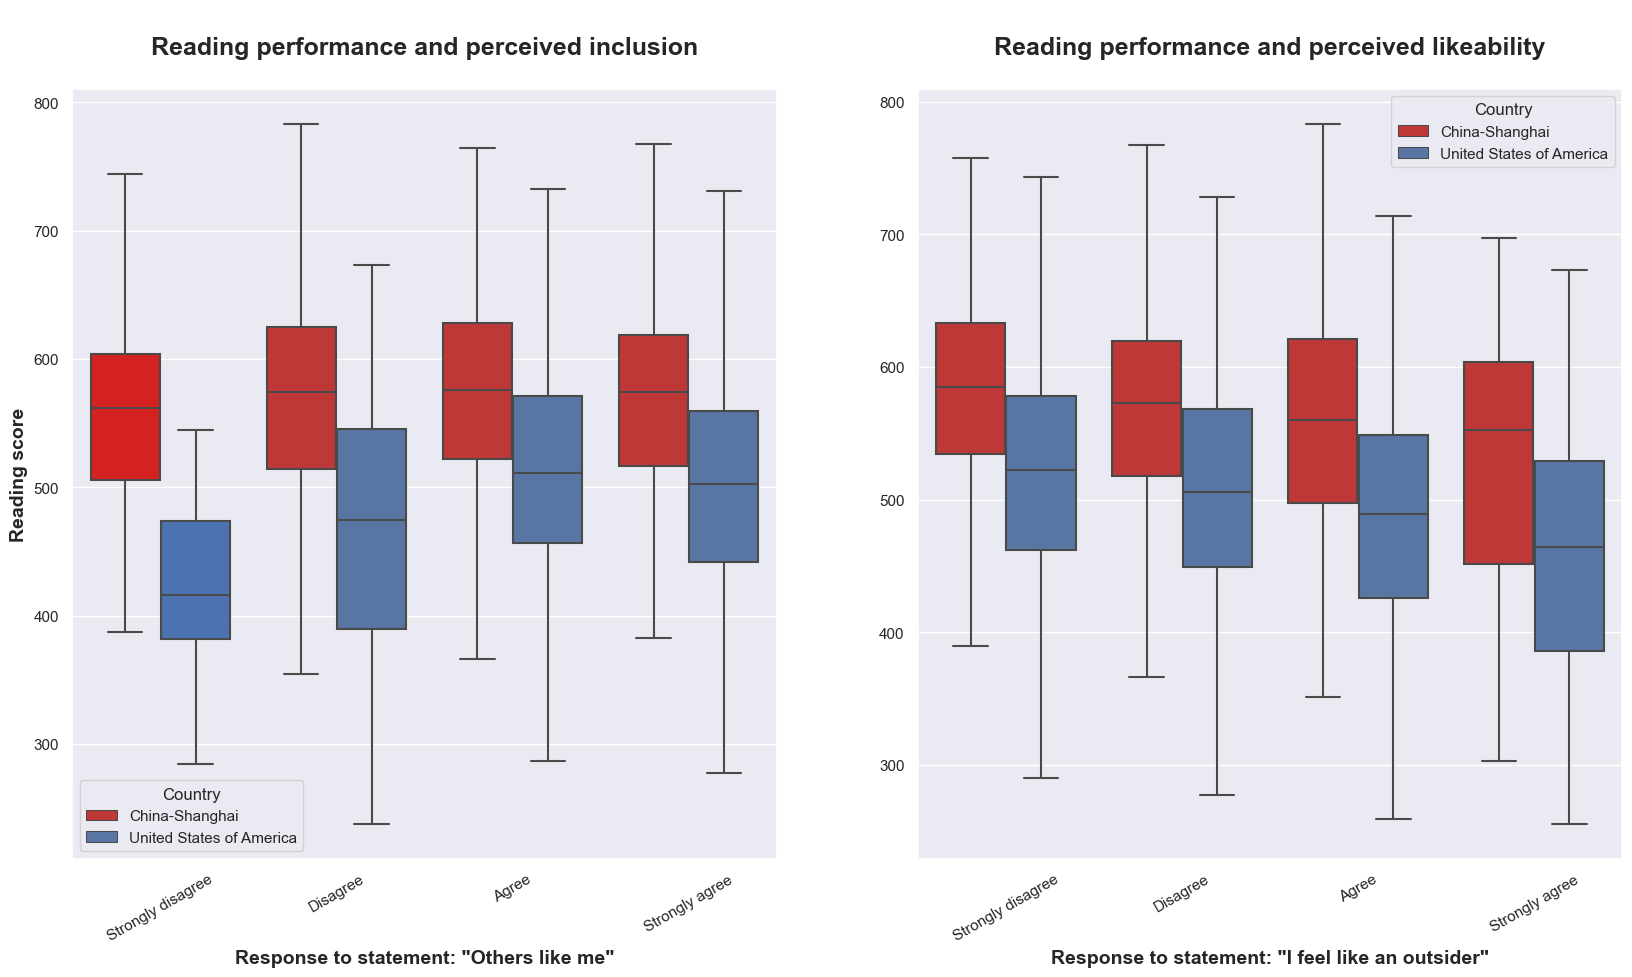

In [10]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(20, 10)

sns.boxplot(data = df_sub, x = 'others_like_me', y = 'reading_pv1',
           hue = 'Country', ax=axes[0], showfliers=False)
axes[0].set_xticklabels(labels = others_like_likert, rotation=30)

sns.boxplot(data= df_sub, x = 'feel_outsider', y = 'reading_pv1',
           hue= 'Country', ax=axes[1], showfliers=False)
axes[1].set_xticklabels(labels = feel_outsider_likert, rotation=30);
my_colours = (Chinese_red, highlight)
sns.set_palette(my_colours)

boxes = f.findobj(matplotlib.patches.PathPatch)
for color, box in zip(my_colours[::2]+my_colours[1::2], boxes):
    box.set_facecolor(color)

axes[1].set_title('\nReading performance and perceived likeability\n', fontsize=18, fontweight="bold");
axes[0].set_title('\nReading performance and perceived inclusion\n', fontsize = 18, fontweight="bold")
axes[0].set_xlabel('Response to statement: "Others like me"', fontsize=14, fontweight="bold");
axes[0].set_ylabel('Reading score', fontsize=14, fontweight="bold");
axes[1].set_xlabel('Response to statement: "I feel like an outsider"', fontsize=14, fontweight="bold")
axes[1].set_ylabel(' ', fontsize=14);


# https://stackoverflow.com/questions/51899470/individual-colours-for-grouped-boxplots-in-seaborn for color